![](../img/r_and_python.jpg)

## Combine R and Python Strengths in the same python Notebook 🚀

### Lets be more agile by using R and python in the same jupyter Notebook and give more flexibility to Developers :-)

### before we start : 
*  Installing rpy2 Two option to install it
    * ``pip install rpy2==3.2.6``
    * ``conda install rpy2 ( If you use anaconda )``

In [1]:
import warnings
warnings.filterwarnings('ignore') ## To ignore the worning in python 

In [2]:
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

In [3]:
%load_ext rpy2.ipython
## load  extension rpy2

### First Example Create pandas DF and Use it in R prog language 👍

In [4]:
import pandas as pd
## Creaty mock DataFrame Using Pandas
df = pd.DataFrame({'name': ['Abdelbarre', 'Imrane', 'John', 'Philippe','Youssef'],
                   'age': [44, 55, 53, 26, 19],
                   'country': ['MAR', 'MAR','AUS', 'FRA','CAN'],
                   'salary': [150, 200, 300, 170, 200]})

In [5]:
## show DF Data 
df.head()

,name,age,country,salary
0,Abdelbarre,44,MAR,150
1,Imrane,55,MAR,200
2,John,53,AUS,300
3,Philippe,26,FRA,170
4,Youssef,19,CAN,200


#### Transforme Pandas DF into R Dataframe 

In [6]:
## Transforme Pandas DF into R Dataframe 
r_df = pandas2ri.py2ri(df)

In [7]:
print('original Df Type is :')
print(type(df))
print('++             +++')
print('+++            +++')
print(' ')
print('The newest r_df Type is  :')
print(type(r_df))


original Df Type is :
<class 'pandas.core.frame.DataFrame'>
++             +++
+++            +++
 
The newest r_df Type is  :
<class 'rpy2.robjects.vectors.DataFrame'>


Now we Have Both Dfs one is R dataframe and the other is Pandas Df 

In [8]:
print(r_df)

        name age country salary
0 Abdelbarre  44     MAR    150
1     Imrane  55     MAR    200
2       John  53     AUS    300
3   Philippe  26     FRA    170
4    Youssef  19     CAN    200



## Calling rpy2 Lib using Magic Command 💪

In [9]:
%%R 
## Create R dataframe using read.csv
r_df_countries_index = read.csv(file = '../data/countries.csv',header = TRUE, sep = ";" )

In [10]:
%%R
## head function to show a simple data
head(r_df_countries_index)

         country area_km         gdp fertility_rate unemployment_rate
1    Afghanistan  647500 21500000000           6.75                NA
2       Akrotiri     123                         NA                NA
3        Albania   28748 17460000000           2.04              14.8
4        Algeria 2381740   2,123E+11           1.92              25.4
5 American Samoa     199   500000000           3.25               6.0
6        Andorra     468  1900000000           1.29               0.0


In [11]:
%%R
#Create Df which contains only Contry, Gdp, and Fertility rate ( Nomber of children by women)
r_df_contries <- subset(r_df_countries_index, select = c(country,fertility_rate))

In [12]:
%%R
## Show data 
head(r_df_contries,20)

                       country fertility_rate
1                  Afghanistan           6.75
2                     Akrotiri             NA
3                      Albania           2.04
4                      Algeria           1.92
5               American Samoa           3.25
6                      Andorra           1.29
7                       Angola           6.27
8                     Anguilla           1.73
9                   Antarctica             NA
10         Antigua and Barbuda           2.26
11                   Argentina           2.19
12                     Armenia           1.32
13                       Aruba           1.79
14 Ashmore and Cartier Islands             NA
15                   Australia           1.76
16                     Austria           1.36
17                  Azerbaijan           2.44
18                 Bahamas The           2.20
19                     Bahrain           2.63
20                Baker Island             NA


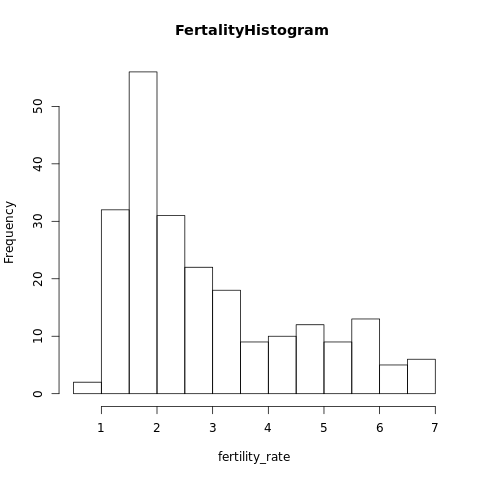

In [13]:
%%R
## simple polt to see the frequency of fertality 
with(r_df_contries,hist(fertility_rate,main='FertalityHistogram '))

#### Let's pass a python value to create a new R Datafarme Column

In [14]:
nw_col_python = "I'm python value :-)"
print(type(nw_col_python))

<class 'str'>


In [15]:
%%R -i nw_col_python  
## nw_col is python value, and we passed as input value
r_df_new = cbind(r_df_contries,nw_col_python)
head(r_df_new,20)

                       country fertility_rate        nw_col_python
1                  Afghanistan           6.75 I'm python value :-)
2                     Akrotiri             NA I'm python value :-)
3                      Albania           2.04 I'm python value :-)
4                      Algeria           1.92 I'm python value :-)
5               American Samoa           3.25 I'm python value :-)
6                      Andorra           1.29 I'm python value :-)
7                       Angola           6.27 I'm python value :-)
8                     Anguilla           1.73 I'm python value :-)
9                   Antarctica             NA I'm python value :-)
10         Antigua and Barbuda           2.26 I'm python value :-)
11                   Argentina           2.19 I'm python value :-)
12                     Armenia           1.32 I'm python value :-)
13                       Aruba           1.79 I'm python value :-)
14 Ashmore and Cartier Islands             NA I'm python value